# IMDB Top movies dataset

This dataset contains the best ranked movies on IMDB as well as their characteristic features (genre, title, number of votes by gender and age, ...). The dataset was originally found here: [https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade](https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade)

In this notebook, an Exploratory Data Analysis is performed as well as some modeling, in an attempt to predict the movie rating given its characteristic features. The focus is on the workflow / methodology rather than on the model performance : only linear models are used.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# chaining operations
from sklearn.pipeline import Pipeline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures


# feature selection
from sklearn.feature_selection import RFE

# training
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# performeance metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

/usr/local/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('./data/IMDB/IMDB.csv', encoding='latin-1', index_col=0)

In [4]:
df.shape

(118, 54)

# Data summary

In [5]:
df.shape

(118, 54)

Check that head and tail look similar (no premature end of file import, ...).

In [6]:
df.head()

,Title,Rating,TotalVotes,Genre1,Genre2,Genre3,MetaCritic,Budget,Runtime,ï..CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.1,"496,092",Biography,Drama,History,96.0,"$20,000,000",134 min,75556,126223,161460,83070,27231,9603,4021,2420,1785,4739,313823,82012,1837,1363,457,200910,153669,45301,138762,112943,23895,29252,23072,5726,664,53328,224519,8.1,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
2,127 Hours (2010),7.6,"297,075",Adventure,Biography,Drama,82.0,"$18,000,000",94 min,28939,44110,98845,78451,28394,9403,3796,1930,1161,2059,212866,44600,745,567,170,133336,106007,26152,102120,86609,14304,14895,12400,2261,649,38478,169745,7.6,7.6,7.9,7.9,7.9,7.7,7.8,7.7,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
3,50/50 (2011),7.7,"283,935",Comedy,Drama,Romance,72.0,"$8,000,000",100 min,28304,47501,99524,71485,24252,7545,2381,1109,634,1202,188925,58348,506,348,153,132350,96269,34765,94745,75394,18163,12829,9912,2681,555,46947,147849,7.7,7.7,7.9,7.9,7.9,7.8,7.8,7.7,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
4,About Time (2013),7.8,"225,412",Comedy,Drama,Fantasy,NaN,"$12,000,000",123 min,38556,43170,70850,45487,16542,5673,2210,1084,664,1182,126718,58098,654,325,321,92940,57778,34126,67477,50212,16222,13973,10690,3026,475,20450,111670,7.8,7.9,8.2,8.1,8.3,8.0,8.0,8.0,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
5,Amour (2012),7.9,"76,121",Drama,Romance,NaN,94.0,"$8,900,000",127 min,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [7]:
df.tail()

,Title,Rating,TotalVotes,Genre1,Genre2,Genre3,MetaCritic,Budget,Runtime,ï..CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
114,Whiplash (2014),8.5,"492,285",Drama,Music,NaN,88.0,"$3,300,000",107 min,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
115,Wreck-It Ralph (2012),7.7,"295,125",Animation,Adventure,Comedy,72.0,"Opening Weekend: 49,038,712 ...",NaN,41980,50262,96477,67934,24894,7748,2724,1190,703,1226,190983,50202,1663,1182,467,120962,90759,29003,90203,74767,14148,13706,11356,2112,614,44962,129487,7.7,7.8,7.9,7.9,8.0,7.9,7.9,7.9,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
116,X-Men: Days of Future Past (2014),8.0,"560,736",Action,Adventure,Sci-Fi,74.0,"$200,000,000",132 min,91765,127521,183578,104658,33027,10059,3710,1903,1225,3301,370835,71008,3038,2403,614,220178,179039,39094,158607,135392,20927,26834,22460,3884,710,67889,229049,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
117,X-Men: First Class (2011),7.8,"556,713",Action,Adventure,Sci-Fi,65.0,"$160,000,000",132 min,64428,96219,200144,129352,41945,12861,4799,2349,1448,3182,382107,80444,2075,1612,443,223309,176821,44428,185909,157332,26094,30217,25051,4691,780,87542,257681,7.7,7.9,8.0,7.9,8.3,7.9,7.9,8.0,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7
118,Zootopia (2016),8.1,"309,474",Animation,Adventure,Comedy,78.0,"$150,000,000",108 min,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.7,7.6,8.0,8.0


In [8]:
df.dtypes

Title            object
Rating          float64
TotalVotes       object
Genre1           object
Genre2           object
Genre3           object
MetaCritic      float64
Budget           object
Runtime          object
ï..CVotes10       int64
CVotes09          int64
CVotes08          int64
CVotes07          int64
CVotes06          int64
CVotes05          int64
CVotes04          int64
CVotes03          int64
CVotes02          int64
CVotes01          int64
CVotesMale       object
CVotesFemale     object
CVotesU18        object
CVotesU18M       object
CVotesU18F       object
CVotes1829       object
CVotes1829M      object
CVotes1829F      object
CVotes3044       object
CVotes3044M      object
CVotes3044F      object
CVotes45A        object
CVotes45AM       object
CVotes45AF       object
CVotes1000       object
CVotesUS         object
CVotesnUS        object
VotesM           object
VotesF           object
VotesU18         object
VotesU18M        object
VotesU18F        object
Votes1829       

Analyzing the data types shows that some variables need to be transformed. Variables that are expected to be numeric (votes, budget, ...) that have the **obejct** Pandas type are seen as strings by Python. They need to be processed.

For **TotalVotes**, let's get rid of the ',' separator for thousands. **Budget** fields requires to remove currency signs and commas. When **Budget** contains plain text, the row is removed.

In [9]:
df['TotalVotes'] = df['TotalVotes'].str.replace(',', '').astype(int)

In [10]:
df = df[df['Budget'].str.contains('Opening') == False]
df['Budget'] = df['Budget'].str.replace('$', '')
df['Budget'] = df['Budget'].str.replace(',', '')
df['Budget'] = df['Budget'].str.replace('.*£', '')
df = df[df['Budget'].str.contains('[aA-zZ]') == False]
df['Budget'] = df['Budget'].astype(int)

**Runtime** is extracted with a regular expression to get rid of the 'min' (for minutes) symbol.

In [11]:
df['Runtime'] = df['Runtime'].str.extract('(\d+)')
df = df.loc[df['Runtime'].isnull() == False, :]
df['Runtime'] = df['Runtime'].astype(int)

Convert the rating to float.

In [12]:
df['VotesUS'] = df['VotesUS'].astype(float)
df['VotesnUS'] = df['VotesnUS'].astype(float)

df['VotesM'] = df['VotesM'].astype(float)

df['VotesF'] = df['VotesF'].astype(float)

df['VotesU18'] = df['VotesU18'].astype(float)

df['VotesU18M'] = df['VotesU18M'].astype(float)

df['VotesU18F'] = df['VotesU18F'].astype(float)

df['Votes1829M'] = df['Votes1829M'].astype(float)

df['Votes1829F'] = df['Votes1829F'].astype(float)

df['Votes3044'] = df['Votes3044'].astype(float)
df['Votes3044M'] = df['Votes3044M'].astype(float)
df['Votes3044F'] = df['Votes3044F'].astype(float)

df['Votes45A'] = df['Votes45A'].astype(float)
df['Votes45AM'] = df['Votes45AM'].astype(float)
df['Votes45AF'] = df['Votes45AF'].astype(float)

df['CVotesMale'] = df['CVotesMale'].astype(int)
df['CVotesFemale'] = df['CVotesFemale'].astype(int)

Let's check the types again:

In [13]:
df.dtypes

Title            object
Rating          float64
TotalVotes        int64
Genre1           object
Genre2           object
Genre3           object
MetaCritic      float64
Budget            int64
Runtime           int64
ï..CVotes10       int64
CVotes09          int64
CVotes08          int64
CVotes07          int64
CVotes06          int64
CVotes05          int64
CVotes04          int64
CVotes03          int64
CVotes02          int64
CVotes01          int64
CVotesMale        int64
CVotesFemale      int64
CVotesU18        object
CVotesU18M       object
CVotesU18F       object
CVotes1829       object
CVotes1829M      object
CVotes1829F      object
CVotes3044       object
CVotes3044M      object
CVotes3044F      object
CVotes45A        object
CVotes45AM       object
CVotes45AF       object
CVotes1000       object
CVotesUS         object
CVotesnUS        object
VotesM          float64
VotesF          float64
VotesU18        float64
VotesU18M       float64
VotesU18F       float64
Votes1829       

In [14]:
df.head()

,Title,Rating,TotalVotes,Genre1,Genre2,Genre3,MetaCritic,Budget,Runtime,ï..CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.1,496092,Biography,Drama,History,96.0,20000000,134,75556,126223,161460,83070,27231,9603,4021,2420,1785,4739,313823,82012,1837,1363,457,200910,153669,45301,138762,112943,23895,29252,23072,5726,664,53328,224519,8.1,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
2,127 Hours (2010),7.6,297075,Adventure,Biography,Drama,82.0,18000000,94,28939,44110,98845,78451,28394,9403,3796,1930,1161,2059,212866,44600,745,567,170,133336,106007,26152,102120,86609,14304,14895,12400,2261,649,38478,169745,7.6,7.6,7.9,7.9,7.9,7.7,7.8,7.7,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
3,50/50 (2011),7.7,283935,Comedy,Drama,Romance,72.0,8000000,100,28304,47501,99524,71485,24252,7545,2381,1109,634,1202,188925,58348,506,348,153,132350,96269,34765,94745,75394,18163,12829,9912,2681,555,46947,147849,7.7,7.7,7.9,7.9,7.9,7.8,7.8,7.7,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
4,About Time (2013),7.8,225412,Comedy,Drama,Fantasy,NaN,12000000,123,38556,43170,70850,45487,16542,5673,2210,1084,664,1182,126718,58098,654,325,321,92940,57778,34126,67477,50212,16222,13973,10690,3026,475,20450,111670,7.8,7.9,8.2,8.1,8.3,8.0,8.0,8.0,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
5,Amour (2012),7.9,76121,Drama,Romance,NaN,94.0,8900000,127,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


Several plots are constructed below. They show how to do basic plotting with **Seaborn** as well as handling age / gender groups to make relevant plots. In particular, converting a wide dataset to a long dataset is demonstrated.

# Ratings by Genre

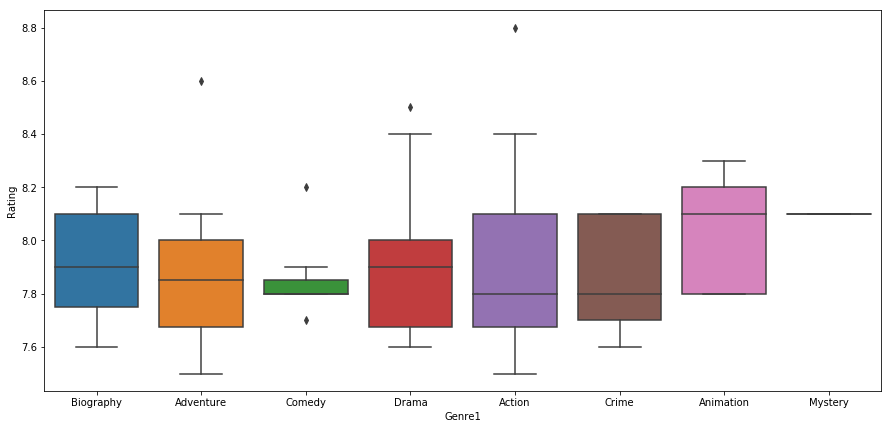

In [15]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='Genre1', y='Rating')

# Ratings by Age group

To plot the movie ratings by age group:
* extract the different groups to be plotted (to get rid of irrelevant Male / Female groups)
* change the dataset shape from wide to long with `pd.wide_to_long()``

In [16]:
age_groups = ['Title', 'Genre1', 'VotesU18', 'Votes1829', 'Votes3044', 'Votes45A']
df_age = pd.wide_to_long(df[age_groups], stubnames='Votes', i='Title', j='Group', suffix='[A-Z]?\d+[A-Z]*')
df_age.reset_index(inplace=True)
df_age['Votes'] = df_age['Votes'].astype(float)

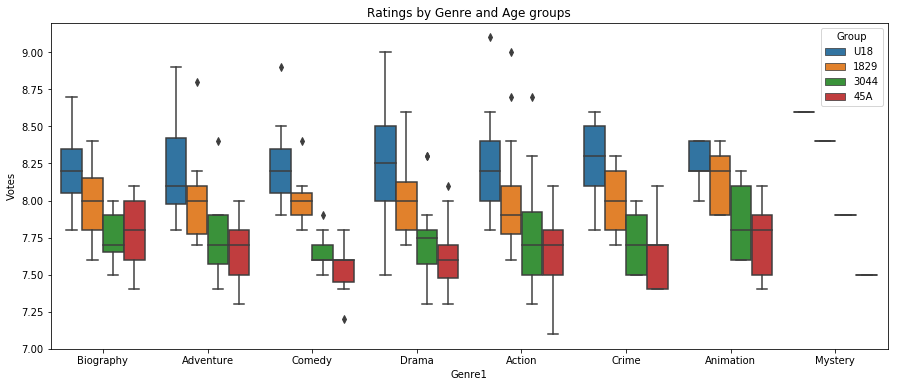

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_age, x='Genre1', y='Votes', hue='Group')
plt.title('Ratings by Genre and Age groups');

It seems that the **Under 18** age group usually shows higher variability in its rating, and on average rates the movies higher than the other age groups. 

One may even spot a trend -- the older one gets, the poorer ratig they give.

# Ratings by Gender

In [18]:
age_groups = ['Title', 'Genre1', 'VotesM', 'VotesF']
df_gender = pd.wide_to_long(df[age_groups], stubnames='Votes', i='Title', j='Gender', suffix='[A-Z]')
df_gender.reset_index(inplace=True)
df_gender['Votes'] = df_gender['Votes'].astype(float)

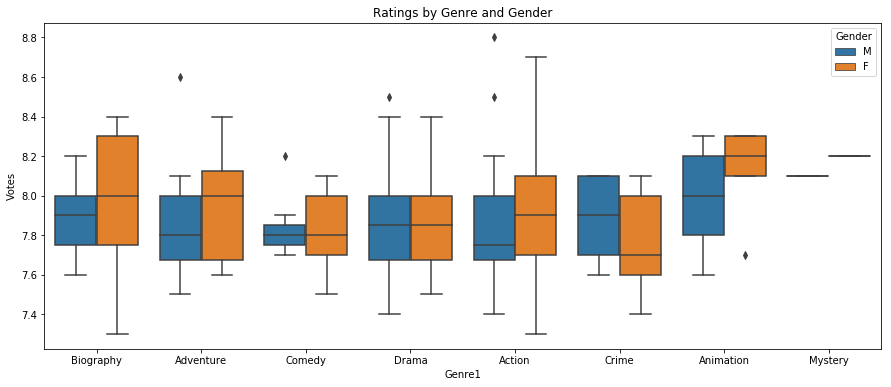

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_gender, x='Genre1', y='Votes', hue='Gender')
plt.title('Ratings by Genre and Gender');

It seems that women give higher ratings than men on average for all genres, except for **Crime** genre.
Women give a better grade than men to **Action** movies on average but with much higher variability (they may be more picky... ;)).

End of the descriptive analysis. 

___

Quick sanity check for missing values so far:

In [20]:
mask = ['Genre1', 'Title', 'Budget', 'Runtime', 'CVotesMale', 'CVotesFemale', 'Rating']
df[mask].apply(lambda x: x.isnull().any(), axis=0)

Genre1          False
Title           False
Budget          False
Runtime         False
CVotesMale      False
CVotesFemale    False
Rating          False
dtype: bool

Let's plot the correlation matrix, keeping in mind only the numeric features wiwll be plotted.

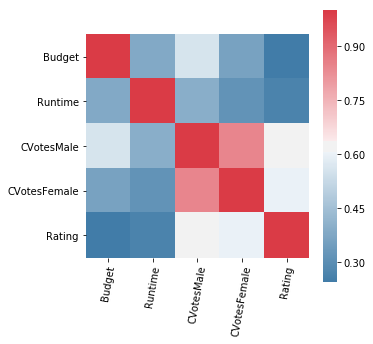

In [21]:
corr_matrix = df[mask].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, 
            cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True)

plt.xticks(rotation=80);

In [27]:
corr_matrix['Rating'].sort_values(ascending=False)

Rating          1.000000
CVotesMale      0.618891
CVotesFemale    0.601030
Runtime         0.269386
Budget          0.246412
Name: Rating, dtype: float64

There aren't that many features so far and correlation with **Rating** is quite low.

# Feature engineering

For this modeling phase, let's try to predict the rating of the movie using only the following variables:
* Genre1: the movie genre
* Title: the movie title
* Budget: movie budget
* Runtime: duration
* CVotesM: number of males that voted
* CVotesF: numbre of females that voted

## One-hot encoding on Genre feature

The **Genre** feature is a categorical feature. To be handled properly it has to be:
* label encoded: convert labels to integers
* one-hot encoded: convert each integer category to a separate binary variable<

In [28]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)

genre_feature = label_encoder.fit_transform(df['Genre1'])
genre_feature = genre_feature.reshape(genre_feature.shape[0], 1)
genre_feature = one_hot_encoder.fit_transform(genre_feature)
genre_columns = ['genre_' + elem for elem in df['Genre1'].value_counts().index]

In [29]:
genre_df = pd.DataFrame(genre_feature, columns=genre_columns)
genre_df.head()

,genre_Action,genre_Drama,genre_Biography,genre_Adventure,genre_Crime,genre_Comedy,genre_Animation,genre_Mystery
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Handling Title feature

Basic feature engineering here: let's use the number of word in the title as an explicative feature.

In [81]:
title_feature = df['Title'].apply(lambda x: len(x.split(sep=' ')))

## Male / Female votant ratio

In [82]:
mf_ratio = pd.Series(df.apply(lambda x: x['CVotesMale'] / x['CVotesFemale'], axis=1), name='mf_ratio')

## Merging features

The different features that have been created are merged together. `reset_index()` is used to make sure the concatenation is performed smoothly in case indexes are different. `drop=True` avoids an index to be inserted as a column.

In [83]:
mask = ['Budget', 'Runtime', 'CVotesMale', 'CVotesFemale']
features = pd.concat([df[mask].reset_index(drop=True), 
                      genre_df, 
                      title_feature.reset_index(drop=True), 
                     mf_ratio.reset_index(drop=True)],
                     axis=1)

In [84]:
target = 'Rating'
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=7)

In [85]:
X_train.shape

(77, 14)

So we have 77 samples and 14 features so far in the dataset.

# Modeling Phase

For this modeling phase, let's try to predict the rating of the movie using only the following variables:
* Genre1: the movie genre
* Title: the movie title
* Budget: movie budget
* Runtime: duration
* CVotesM: number of males that voted
* CVotesF: numbre of females that voted

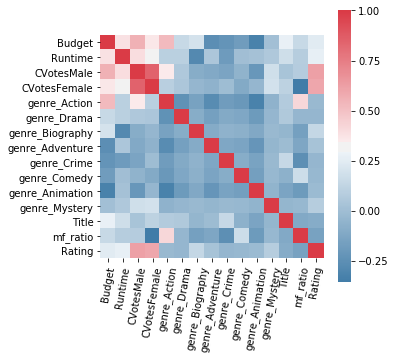

In [86]:
corr_matrix = pd.concat([features.reset_index(drop=True), df['Rating'].reset_index(drop=True)], axis=1).corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, 
            cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True)

plt.xticks(rotation=80);

In [87]:
corr_matrix['Rating'].sort_values(ascending=False)

Rating             1.000000
CVotesMale         0.618891
CVotesFemale       0.601030
Runtime            0.269386
Budget             0.246412
genre_Biography    0.139737
genre_Mystery      0.085937
genre_Adventure    0.025791
genre_Animation   -0.013915
genre_Action      -0.024751
genre_Comedy      -0.032437
genre_Drama       -0.038111
genre_Crime       -0.039027
Title             -0.097284
mf_ratio          -0.149406
Name: Rating, dtype: float64

# Model building

For model building, a dummy model is created to serve as a reference. Then, several linear models are used. Due to the small number of samples, it is relevant to use regularization here, so that the model choses as few coefficients as possible, which prevents overfitting and lack of generalization. The data is also standardized before applying linear regression to improve performance and for the coefficients to be comparable.

## Baseline model

Let's make a reference dummy model: it will always output the same rating, the average of the movie ratings on the train set. This serves as a reference to assess the performance of the more complex models.

In [88]:
y_pred = y_train.mean() * np.ones((y_train.shape[0], 1))
print('RMSE on train: %.3f' % np.sqrt(mean_squared_error(y_train, y_pred)))

y_pred = y_train.mean() * np.ones((y_test.shape[0], 1))
print('RMSE on test: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE on train: 0.233
RMSE on test: 0.297


## Linear regression

In [89]:
pipe = []
pipe.append(('standardize', StandardScaler()))
pipe.append(('LR', LinearRegression()))
pipe = Pipeline(pipe)
kfold = KFold(n_splits=3, random_state=7)
results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print('Average CV-RMSE: %.4f' % (np.sqrt(-results.mean())))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('RMSE on test set: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

Average CV-RMSE: 0.1979
RMSE on test set: 0.209


## Lasso

In [90]:
pipe = []
pipe.append(('standardize', StandardScaler()))
pipe.append(('Lasso', Lasso()))
pipe = Pipeline(pipe)
kfold = KFold(n_splits=3, random_state=7)
results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print('Average CV-RMSE: %.4f' % (np.sqrt((-results.mean()))))


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('RMSE on test set: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

Average CV-RMSE: 0.2342
RMSE on test set: 0.297


## Ridge

In [91]:
pipe = []
pipe.append(('standardize', StandardScaler()))
pipe.append(('Ridge', Ridge(alpha=1)))
pipe = Pipeline(pipe)
kfold = KFold(n_splits=3, random_state=7)
results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print('Average CV-RMSE: %.4f' % np.sqrt((-results.mean())))


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('RMSE on test set: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

Average CV-RMSE: 0.1962
RMSE on test set: 0.207


In [92]:
for feat, c in zip(X_train.columns.values, pipe.steps[1][1].coef_):
    print('%s: %.3f' % (feat, c))

Budget: -0.015
Runtime: 0.059
CVotesMale: 0.187
CVotesFemale: -0.050
genre_Action: -0.038
genre_Drama: -0.026
genre_Biography: 0.066
genre_Adventure: 0.012
genre_Crime: 0.014
genre_Comedy: -0.003
genre_Animation: 0.008
genre_Mystery: -0.011
Title: -0.031
mf_ratio: -0.035


Let's stop here for the modeling and analyze the results from the Ridge model. It seems that **Runtime** and **CVotesMale** (number of male votants) have a positive impact on the **Rating** while high **Budget** and long **Title** leed to a poorer rating.

To be more thorough it could be interesting to perform statistic tests on those coefficients to assess for their nullity.

# Conclusion

The purpose of the notebook was to show some ways of investigating this dataset, be it from the EDA perspectiev (handling wide dataset and converting them to the long format for group comparisons) or modeling.

All the conclusions should be taken with care, due to a small dataset size.